In [1]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data_engs = np.load("data/condMADE-datasets/484-z4-1mus/1cond-var/train_1mus_eng.npy")[:, 0]
neigh, coup, len_neigh = get_couplings(22, "data/couplings/484-z4.txt")
print(f"mean dataset: {data_engs.mean()}")
print(f"min dataset: {data_engs.min()}")

mean dataset: -0.7021283618736135
min dataset: -0.7433134379818196


In [3]:
samples068 = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485_1us-emean-0.68.npz")
samples068 = samples068["sample"]
engs068 = []
for sample in samples068:
    engs068.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

# # Mean of the dataset
samples07021 = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485_1us-emean-0.7021.npz")
samples07021 = samples07021["sample"]
engs07021 = []
for sample in samples07021:
    engs07021.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples073 = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-1us-emean-0.73.npz")
samples073 = samples073["sample"]
engs073 = []
for sample in samples073:
    engs073.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

FileNotFoundError: [Errno 2] No such file or directory: 'data/made-samples/484spins/1cond-var/sample-100000_size-485_1us-emean-0.68.npz'

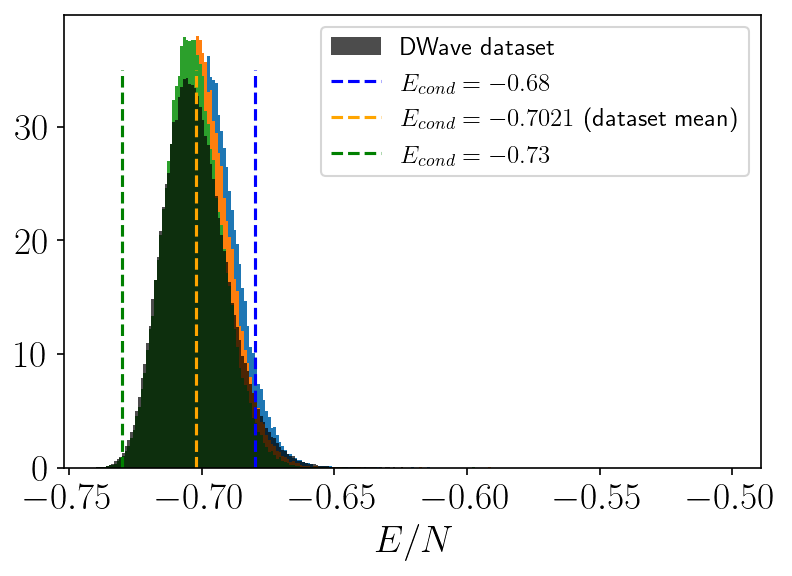

In [10]:
bins = np.arange(-0.74, -0.5, 0.001)

plt.hist(engs068, bins=bins, density=True)
plt.hist(engs07021, bins=bins, density=True)
plt.hist(engs073, bins=bins, density=True)
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave dataset", density=True, color="k")
plt.vlines(-0.68, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.68$", colors="blue")
plt.vlines(-0.7021, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.73, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.73$", colors="green")
plt.xlabel(r"$E/N$")
plt.legend(fontsize=12)
plt.show()

---
# New CondMADE
---


In [3]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
bins = np.arange(-0.74, -0.5, 0.001)


In [7]:
data_engs = np.load("data/condMADE-datasets/484-z4-1mus/484cond-var/train_1mus_eng.npy")[:, 0]
neigh, coup, len_neigh = get_couplings(22, "data/couplings/484-z4.txt")
data_mean = np.mean(data_engs)
print(f"mean dataset: {data_mean}")
print(f"min dataset: {data_engs.min()}")

print(f"mean dataset converted norm: {(data_mean - data_engs.min())/(data_engs.max() - data_engs.min())}")
print(f"conversion norm: {(-0.68 - data_engs.min())/(data_engs.max() - data_engs.min())}")

print(f"mean dataset converted stand: {(data_mean - data_engs.mean())/(data_engs.std())}")
print(f"conversion stand: {(-0.72 - data_engs.mean())/(data_engs.std())}")

# plt.hist(data_engs, bins=200)
# plt.show()


mean dataset: -0.7021283618736135
min dataset: -0.7433134379818196
mean dataset converted norm: 0.3470336012551108
conversion norm: 0.5334915573045418
mean dataset converted stand: 0.0
conversion stand: -1.4660204229063067


In [11]:
samples067 = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd-0.67_2023-11-10_484-dwave-newMADE.npz")
samples = samples067["sample"]

engs067 = []
for sample in samples:
    engs067.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    

samples07 = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd-0.7_2023-11-10_484-dwave-newMADE.npz")
samples = samples07["sample"]

engs07 = []
for sample in samples:
    engs07.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples0755 = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd-0.755_2023-11-10_484-dwave-newMADE.npz")
samples = samples0755["sample"]

engs0755 = []
for sample in samples:
    engs0755.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))


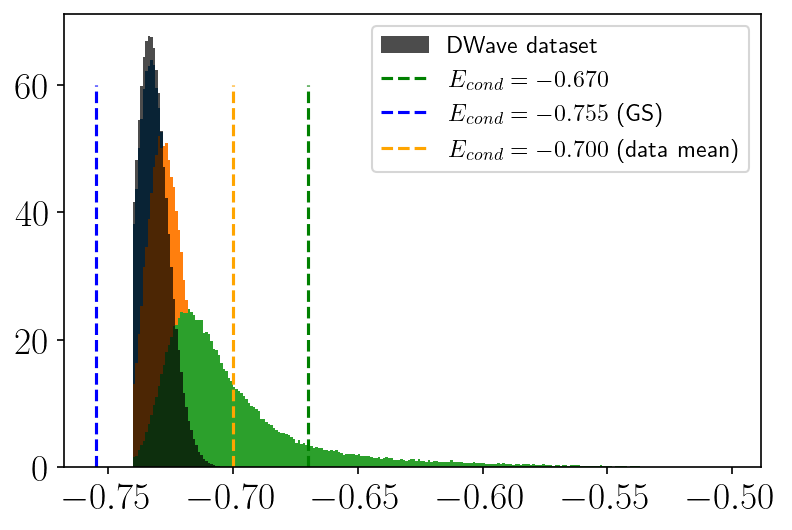

In [4]:
bins = np.arange(-0.74, -0.5, 0.001)

plt.hist(engs0755, bins=bins, alpha=1, density=True)
plt.hist(engs07, bins=bins, density=True)
plt.hist(engs067, bins=bins, density=True)
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave dataset", density=True, color="k")
plt.vlines(-0.67, 0, 60, linestyle="dashed", color="green", label=r"$E_{cond}=-0.670$")
plt.vlines(-0.755, 0, 60, linestyle="--", color="blue", label=r"$E_{cond}=-0.755$ (GS)")
plt.vlines(-0.7, 0, 60, linestyle="--", color="orange", label=r"$E_{cond}=-0.700$ (data mean)")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()

---
# Unconditioned MADE
---

In [12]:
dataset = np.load("data/484-z4-1mus/test-484spins-1nn-uniform-1mus.npy")
data_engs = []
for sample in dataset:
    data_engs.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))


samples2layers = np.load("data/made-samples/NotConditional/sample-100000_size-484-conditional-false.npz")
samples = samples2layers["sample"]

engs2layers = []
for sample in samples:
    engs2layers.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

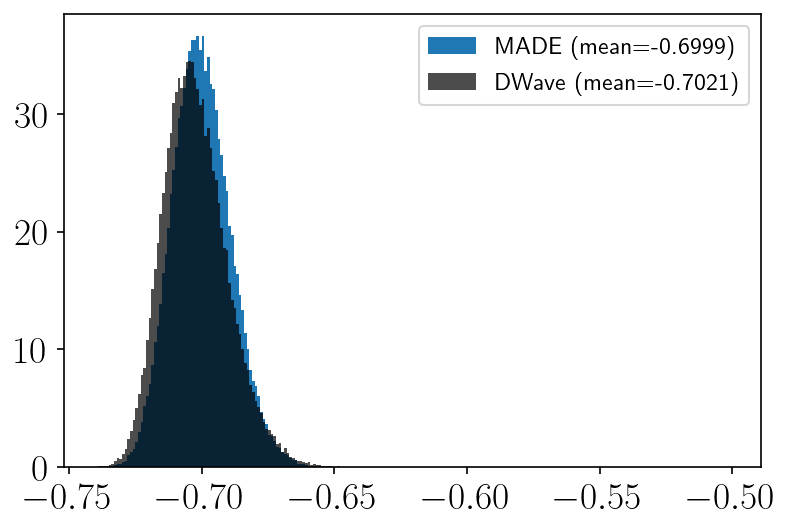

mean dataset: -0.7022218222527157
min samples: -0.7397963417024777
mean samples: -0.6999021526210257


In [13]:

plt.hist(engs2layers, bins=bins, density=True, label="MADE (mean=-0.6999)")
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave (mean=-0.7021)", density=True, color="k")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()
print(f"mean dataset: {np.mean(data_engs)}")
print(f"min samples: {np.min(engs2layers)}")
print(f"mean samples: {np.mean(engs2layers)}")

---
# 484 conditional variables
---

In [18]:
samples065 = np.load("sample-100000_size-968-Econd0.35_2023-11-14_09-52-19.npz")
samples = samples065["sample"]

engs065 = []
for sample in samples:
    engs065.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples067 = np.load("sample-100000_size-968-Econd0.33_2023-11-14_09-52-19.npz")
samples = samples067["sample"]

engs067 = []
for sample in samples:
    engs067.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples_emean = np.load("sample-100000_size-968-Econd0.2978_2023-11-14_09-52-19.npz")
samples = samples_emean["sample"]

engs_emean = []
for sample in samples:
    engs_emean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

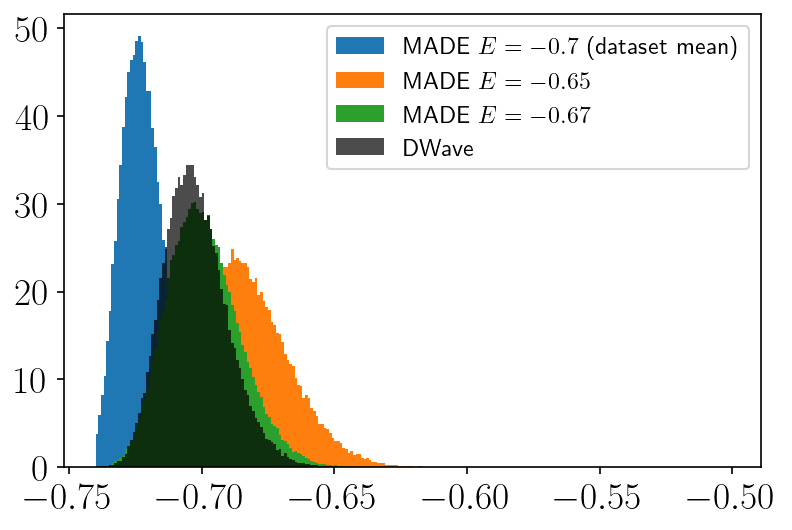

In [19]:
plt.hist(engs_emean, bins=bins, density=True, label="MADE $E=-0.7$ (dataset mean)")
plt.hist(engs065, bins=bins, density=True, label="MADE $E=-0.65$")
plt.hist(engs067, bins=bins, density=True, label="MADE $E=-0.67$")
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave", density=True, color="k")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()
# print(f"mean dataset: {np.mean(data_engs)}")
# print(f"mean samples: {np.mean(engs2layers)}")

# print(f"min dataset: {np.min(data_engs)}")
# print(f"min samples: {np.min(engs2layers)}")

In [23]:
data_std = np.std(data_engs)
data_mean = np.mean(data_engs)
data_min = np.min(data_engs)
data_max = np.max(data_engs)
print(f"{data_min}")
print(f"{data_max}")
print(data_min)
mean_converted = (data_mean - data_min)/(data_max - data_min)
print(data_mean)
print(f"Mean data converted: {mean_converted}")

-0.7401507012524781
-0.6392268856107427
-0.7401507012524781
-0.7022218222527157
Mean data converted: 0.3978317803104786


In [56]:
samples2cond = np.load("sample-100000_size-486-Econd0.347_2023-11-14_484-2conditional.npz")
samples = samples2cond["sample"]

engs2cond = []
for sample in samples:
    engs2cond.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples8cond = np.load("sample-100000_size-492-Econd0.347_2023-11-14_15-55-52.npz")
samples = samples8cond["sample"]

engs8cond = []
for sample in samples:
    engs8cond.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples4cond = np.load("sample-100000_size-488-Econd0.347_2023-11-14_484-4conditional.npz")
samples = samples4cond["sample"]

engs4cond = []
for sample in samples:
    engs4cond.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

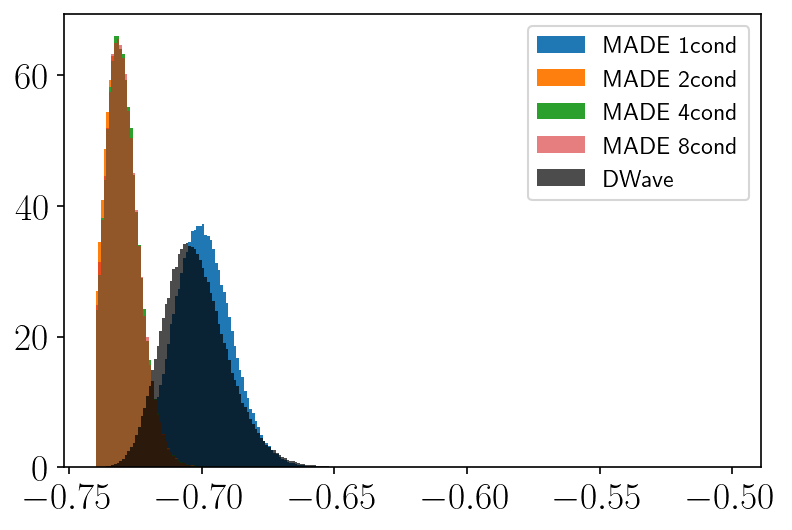

1 varible min energy: -0.7400205932260323
2 varibles min energy: -0.7506820857264459
4 variables min energy: -0.7509913300632223
8 variables min energy: -0.7517792711946273


In [57]:
# plt.hist(engs_emean, bins=bins, density=True, label="MADE $E=-0.7$ (dataset mean)")
# plt.hist(engs1cond, bins=bins, density=True, label="MADE 1cond")
plt.hist(engs2cond, bins=bins, density=True, label="MADE 2cond")
plt.hist(engs4cond, bins=bins, density=True, label="MADE 4cond")
plt.hist(engs8cond, bins=bins, alpha=0.6, density=True, label="MADE 8cond")
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave", density=True, color="k")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()
# print(f"1 varible min energy: {np.min(engs1cond)}")
print(f"2 varibles min energy: {np.min(engs2cond)}")
print(f"4 variables min energy: {np.min(engs4cond)}")
print(f"8 variables min energy: {np.min(engs8cond)}")

In [21]:
samples1GS = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd-0.098726_2023-11-14_484-1conditional.npz")
samples = samples1GS["sample"]

engs1GS = []
for sample in samples:
    engs1GS.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples1cond__ = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.70201_2023-11-14_484-1conditional.npz")
samples = samples1cond__["sample"]

engs1cond__ = []
for sample in samples:
    engs1cond__.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples1cond_ = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.02791_2023-11-14_484-1conditional.npz")
samples = samples1cond_["sample"]

engs1cond_ = []
for sample in samples:
    engs1cond_.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples1cond = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.347_2023-11-14_484-1conditional.npz")
samples = samples1cond["sample"]

engs1cond = []
for sample in samples:
    engs1cond.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

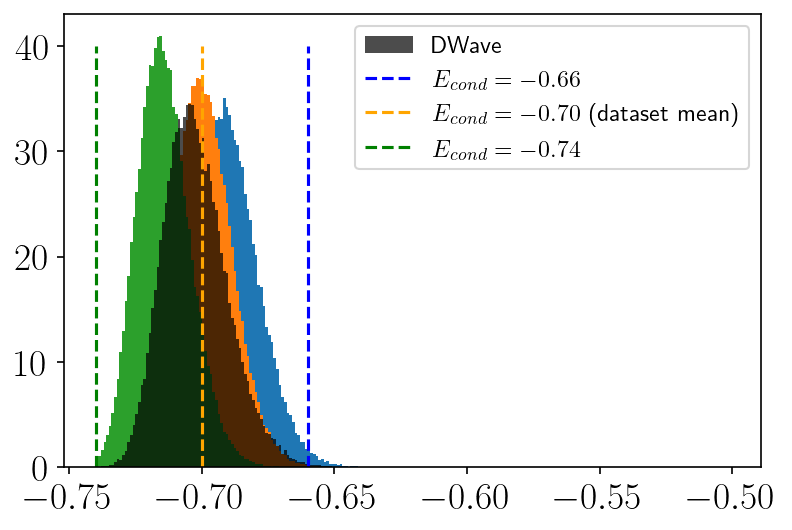

In [22]:
plt.hist(engs1cond__, bins=bins, density=True,)
plt.hist(engs1cond, bins=bins, density=True,)
plt.hist(engs1cond_, bins=bins, density=True,)
# plt.hist(engs1GS, bins=bins, density=True,)
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave", density=True, color="k")
plt.vlines(-0.66, 0, 40, label=r"$E_{cond}=-0.66$", linestyles="--", colors="b")
plt.vlines(-0.70, 0, 40, label=r"$E_{cond}=-0.70$ (dataset mean)", linestyles="--", colors="orange")
plt.vlines(-0.74, 0, 40, label=r"$E_{cond}=-0.74$", linestyles="--", colors="g")
plt.legend(fontsize=11.5)
plt.show()

---
# Corretto
---

### 484 cond vars

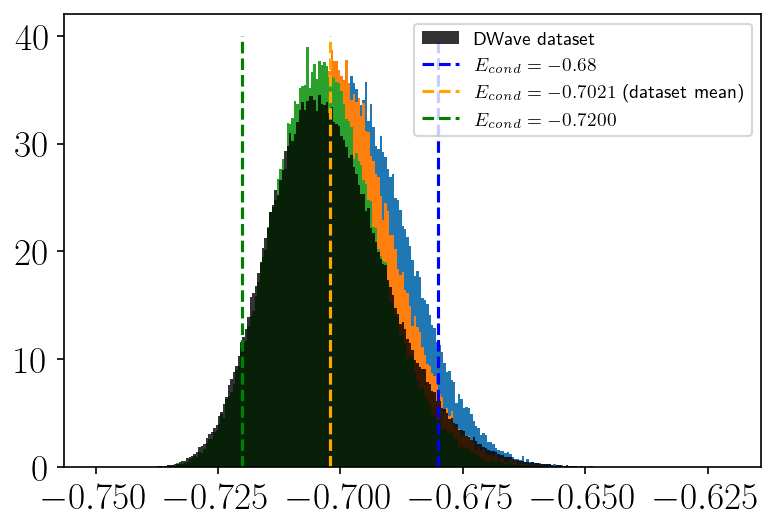

In [35]:
# Normalized energies

samples_068 = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd0.53349_2023-11-16_484-cond484-norm.npz")
samples = samples_068["sample"]

engs_068_484 = []
for sample in samples:
    engs_068_484.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd0.347033_2023-11-16_484-cond484-norm.npz")
samples = samples_mean["sample"]

engs_mean_484 = []
for sample in samples:
    engs_mean_484.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("data/made-samples/484spins/484cond-var/sample-100000_size-968-Econd0.19644_2023-11-16_484-cond484-norm.npz")
samples = samples_072["sample"]

engs_072_484 = []
for sample in samples:
    engs_072_484.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
bins = np.arange(-0.75, -0.62, 0.0005)

plt.hist(engs_068_484, bins=bins, density=True)
plt.hist(engs_mean_484, bins=bins, density=True)
plt.hist(engs_072_484, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7200$", colors="green")

plt.legend(fontsize=9)
plt.show()

### 1 cond vars

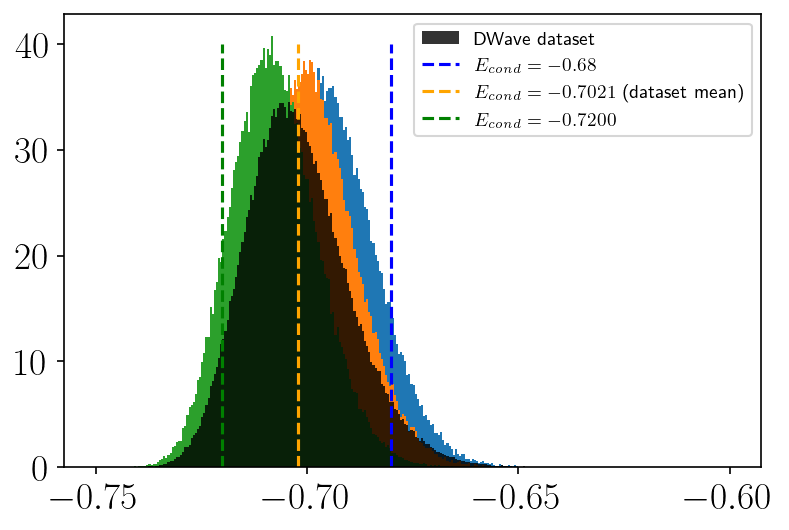

In [36]:
# Normalized energies

samples_068 = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.53349_2023-11-17_484-cond1-norm.npz")
samples = samples_068["sample"]

engs_068_1 = []
for sample in samples:
    engs_068_1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.347033_2023-11-17_484-cond1-norm.npz")
samples = samples_mean["sample"]

engs_mean_1 = []
for sample in samples:
    engs_mean_1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("data/made-samples/484spins/1cond-var/sample-100000_size-485-Econd0.19644_2023-11-17_484-cond1-norm.npz")
samples = samples_072["sample"]

engs_072_1 = []
for sample in samples:
    engs_072_1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068_1, bins=bins, density=True)
plt.hist(engs_mean_1, bins=bins, density=True)
plt.hist(engs_072_1, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7200$", colors="green")

plt.legend(fontsize=9)
plt.show()

### 2 cond vars

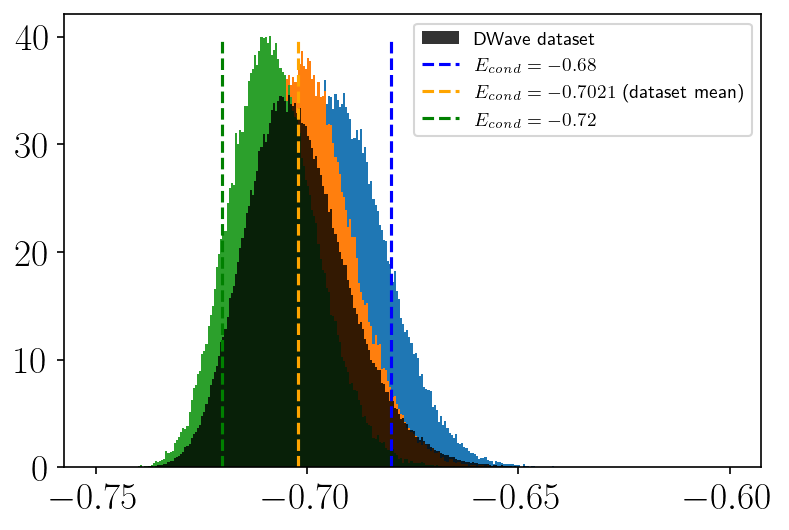

In [37]:
# Normalized energies

samples_068 = np.load("data/made-samples/484spins/2cond-var/sample-100000_size-486-Econd0.53349_2023-11-17_484-cond2-norm.npz")
samples = samples_068["sample"]

engs_068_2 = []
for sample in samples:
    engs_068_2.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("data/made-samples/484spins/2cond-var/sample-100000_size-486-Econd0.347033_2023-11-17_484-cond2-norm.npz")
samples = samples_mean["sample"]

engs_mean_2 = []
for sample in samples:
    engs_mean_2.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("data/made-samples/484spins/2cond-var/sample-100000_size-486-Econd0.19644_2023-11-17_484-cond2-norm.npz")
samples = samples_072["sample"]

engs_072_2 = []
for sample in samples:
    engs_072_2.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068_2, bins=bins, density=True)
plt.hist(engs_mean_2, bins=bins, density=True)
plt.hist(engs_072_2, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.72$", colors="green")

plt.legend(fontsize=9)
plt.show()

### 8 cond vars

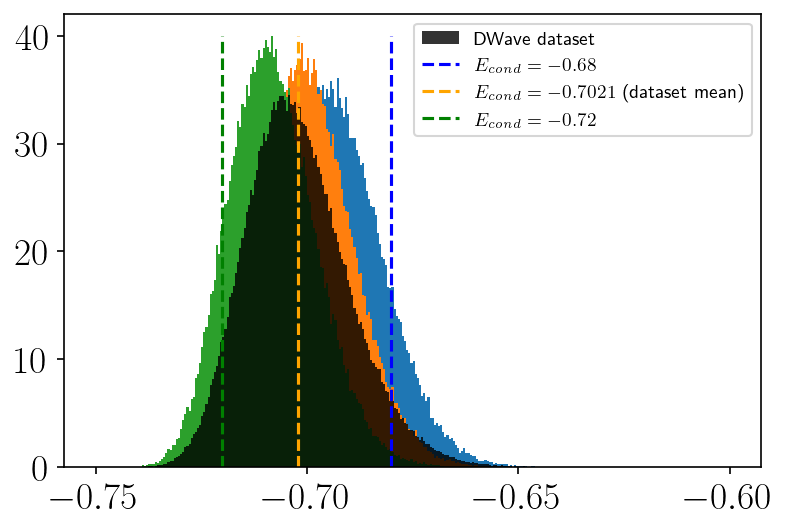

In [30]:
# Normalized energies

samples_068 = np.load("data/made-samples/484spins/8cond-var/sample-100000_size-492-Econd0.53349_2023-11-17_484-cond8-norm.npz")
samples = samples_068["sample"]

engs_068_8 = []
for sample in samples:
    engs_068_8.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("data/made-samples/484spins/8cond-var/sample-100000_size-492-Econd0.347033_2023-11-17_484-cond8-norm.npz")
samples = samples_mean["sample"]

engs_mean_8 = []
for sample in samples:
    engs_mean_8.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("data/made-samples/484spins/8cond-var/sample-100000_size-492-Econd0.19644_2023-11-17_484-cond8-norm.npz")
samples = samples_072["sample"]

engs_072_8 = []
for sample in samples:
    engs_072_8.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068_8, bins=bins, density=True)
plt.hist(engs_mean_8, bins=bins, density=True)
plt.hist(engs_072_8, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.72$", colors="green")

plt.legend(fontsize=9)
plt.show()

### 100 cond vars

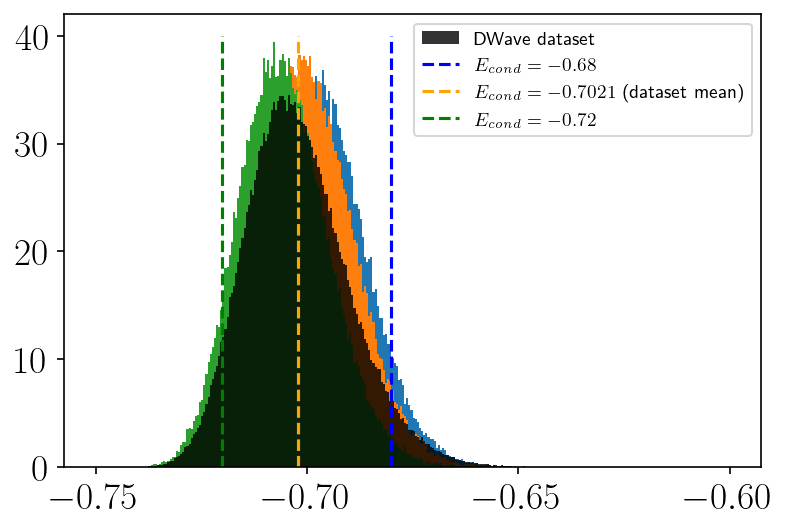

In [32]:
# Normalized energies

samples_068 = np.load("sample-100000_size-584-Econd0.53349_2023-11-17_484-cond100-norm.npz")
samples = samples_068["sample"]

engs_068_100 = []
for sample in samples:
    engs_068_100.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("sample-100000_size-584-Econd0.347033_2023-11-17_484-cond100-norm.npz")
samples = samples_mean["sample"]

engs_mean_100 = []
for sample in samples:
    engs_mean_100.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("sample-100000_size-584-Econd0.19644_2023-11-17_484-cond100-norm.npz")
samples = samples_072["sample"]

engs_072_100 = []
for sample in samples:
    engs_072_100.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068_100, bins=bins, density=True)
plt.hist(engs_mean_100, bins=bins, density=True)
plt.hist(engs_072_100, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.72$", colors="green")

plt.legend(fontsize=9)
plt.show()

### 22 cond variables

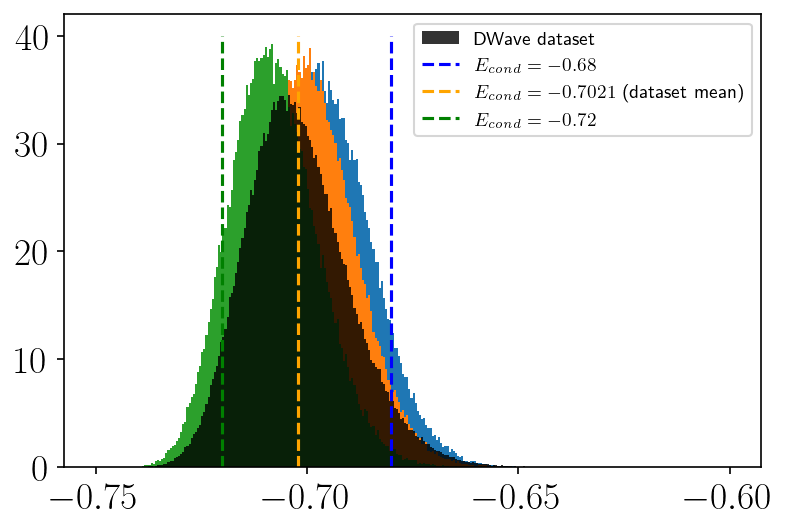

In [33]:
# Normalized energies

samples_068 = np.load("sample-100000_size-506-Econd0.53349_2023-11-18_484-cond22-norm.npz")
samples = samples_068["sample"]

engs_068_22 = []
for sample in samples:
    engs_068_22.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("sample-100000_size-506-Econd0.347033_2023-11-18_484-cond22-norm.npz")
samples = samples_mean["sample"]

engs_mean_22 = []
for sample in samples:
    engs_mean_22.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("sample-100000_size-506-Econd0.19644_2023-11-18_484-cond22-norm.npz")
samples = samples_072["sample"]

engs_072_22 = []
for sample in samples:
    engs_072_22.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068_22, bins=bins, density=True)
plt.hist(engs_mean_22, bins=bins, density=True)
plt.hist(engs_072_22, bins=bins, density=True)
plt.hist(data_engs, bins=bins, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.72$", colors="green")

plt.legend(fontsize=9)
plt.show()

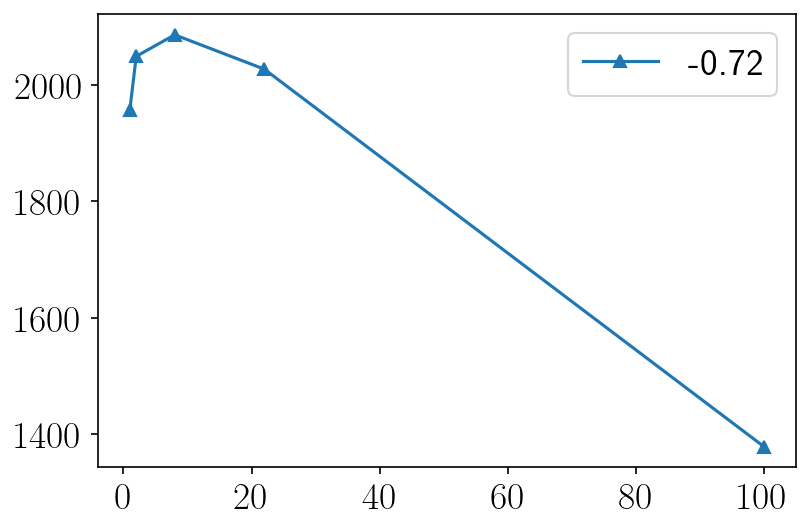

In [90]:
# count_068 = [engs_068_1.count(0.68), engs_068_2.count(0.68), engs_068_8.count(0.68), engs_068_22.count(0.68), engs_068_100.count(0.68), engs_068_484.count(0.68)]
# count_mean = [engs_mean_1.count(), engs_mean_2.count(), engs_mean_8.count(), engs_mean_22.count(), engs_mean_100.count(), engs_mean_484.count()]
# count_072 = [engs_072_1.count(), engs_072_2.count(), engs_072_8.count(), engs_072_22.count(), engs_072_100.count(), engs_072_484.count()]
cond_vars = [1, 2, 8, 22, 100, 484]


def counter(arr: np.array, num: float) -> int:
    count = 0
    for i in np.sort(arr):
        if f"{num}0" in str(i):
            count += 1
    return count


count_068_1 = counter(engs_068_1, -0.68)
count_068_2 = counter(engs_068_2, -0.68)
count_068_8 = counter(engs_068_8, -0.68)
count_068_22 = counter(engs_068_22, -0.68)
count_068_100 = counter(engs_068_100, -0.68)
count_068_484 = counter(engs_068_484, -0.68)

count_068 = [
    count_068_1,
    count_068_2,
    count_068_8,
    count_068_22,
    count_068_100,
    count_068_484,
]

count_mean_1 = counter(engs_mean_1, -0.70)
count_mean_2 = counter(engs_mean_2, -0.70)
count_mean_8 = counter(engs_mean_8, -0.70)
count_mean_22 = counter(engs_mean_22, -0.70)
count_mean_100 = counter(engs_mean_100, -0.70)
count_mean_484 = counter(engs_mean_484, -0.70)

count_mean = [
    count_mean_1,
    count_mean_2,
    count_mean_8,
    count_mean_22,
    count_mean_100,
    count_mean_484,
]

count_072_1 = counter(engs_072_1, -0.72)
count_072_2 = counter(engs_072_2, -0.72)
count_072_8 = counter(engs_072_8, -0.72)
count_072_22 = counter(engs_072_22, -0.72)
count_072_100 = counter(engs_072_100, -0.72)
count_072_484 = counter(engs_072_484, -0.72)

count_072 = [
    count_072_1,
    count_072_2,
    count_072_8,
    count_072_22,
    count_072_100,
    count_072_484,
]

# plt.plot(cond_vars[:-1], count_mean[:-1], "-s")
plt.plot(cond_vars[:-1], count_072[:-1], "-^", label="-0.72")
plt.legend()
plt.show()

---
## Standardized energy
### 1 cond var 

In [8]:
# Standardized energies

samples_068 = np.load("sample-100000_size-485-Econd1.8152_2023-11-17_484-cond1-stand.npz")
samples = samples_068["sample"]

engs_068 = []
for sample in samples:
    engs_068.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_mean = np.load("sample-100000_size-485-Econd0.0_2023-11-17_484-cond1-stand.npz")
samples = samples_mean["sample"]

engs_mean = []
for sample in samples:
    engs_mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples_072 = np.load("sample-100000_size-485-Econd-1.466_2023-11-17_484-cond1-stand.npz")
samples = samples_072["sample"]

engs_072 = []
for sample in samples:
    engs_072.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

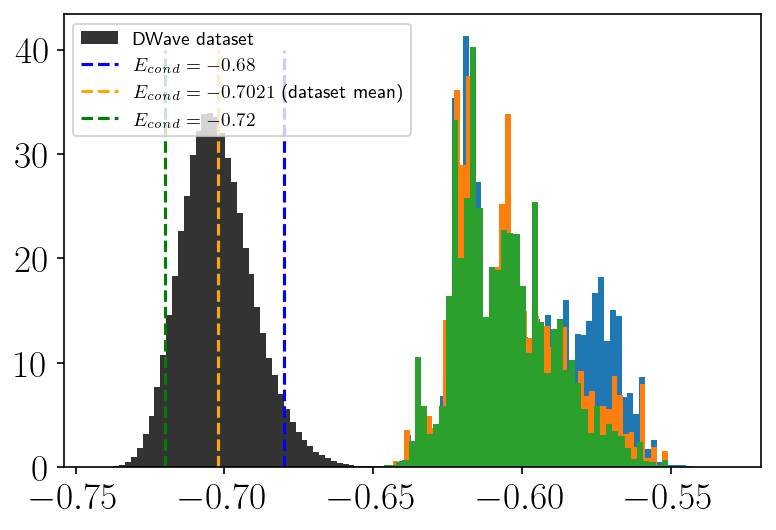

In [12]:
bins = np.arange(-0.75, -0.6, 0.0005)

plt.hist(engs_068, bins=60, density=True)
plt.hist(engs_mean, bins=60, density=True)
plt.hist(engs_072, bins=60, density=True)
plt.hist(data_engs, bins=60, density=True, label="DWave dataset", color="k", alpha=0.8)
plt.vlines(-0.6800, 0, 40, linestyles="dashed", colors="b", label=r"$E_{cond}=-0.68$")
plt.vlines(-0.7021, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.7021$ (dataset mean)", colors="orange")
plt.vlines(-0.72, 0, 40, linestyles="dashed", label=r"$E_{cond}=-0.72$", colors="green")

plt.legend(fontsize=9)
plt.show()